In [2]:
# Setup
import pandas as pd
import numpy as np

In [3]:
#setup to download data directly from the databank
import pandas_datareader
import datetime

In [4]:
#setup to download data directly from world data bank
from pandas_datareader import wb

In [5]:
#define countries we are looking for
countries = ["CN","JP","BR","US","DK","ES","TM","IN","NG"]

In [6]:
#define indicator
indicators = {"NY.GDP.PCAP.KD":"GDP per capita", "NY.GDP.MKTP.CD":"GDP(current US $)", "SP.POP.TOTL":"Population total", 
              "SP.URB.TOTL.IN.ZS":"Urban Population in %", "SP.DYN.TFRT.IN":"Fertility Rate", "SE.ADT.LITR.ZS": "Literacy rate, adult total in %" }

In [7]:
#example download world data bank shown in the lecture
data_wb = wb.download(indicator= indicators, country= countries, start=1990, end=2017)
data_wb = data_wb.rename(columns = {"NY.GDP.PCAP.KD":"gdp_pC","NY.GDP.MKTP.CD":"gdp", "SP.POP.TOTL":"pop", "SP.URB.TOTL.IN.ZS":"urban_pop%", 
                                    "SP.DYN.TFRT.IN":"frt", "SE.ADT.LITR.ZS":"litr"})
data_wb = data_wb.reset_index()
data_wb.head(-5)

,country,year,gdp_pC,gdp,pop,urban_pop%,frt,litr
0,Brazil,2017,10888.982385,2.055506e+12,209288278,86.309,NaN,NaN
1,Brazil,2016,10868.653444,1.793989e+12,207652865,86.042,1.7260,NaN
2,Brazil,2015,11351.565748,1.802214e+12,205962108,85.770,1.7400,92.04790
3,Brazil,2014,11870.148408,2.455994e+12,204213133,85.492,1.7530,91.72943
4,Brazil,2013,11915.417054,2.472807e+12,202408632,85.209,1.7650,91.48424
5,Brazil,2012,11673.770536,2.465189e+12,200560983,84.923,1.7770,91.33785
6,Brazil,2011,11560.418751,2.616202e+12,198686688,84.631,1.7900,91.41124
7,Brazil,2010,11224.154083,2.208872e+12,196796269,84.335,1.8050,90.37918
8,Brazil,2009,10538.778282,1.667020e+12,194895996,84.044,1.8240,90.29821
9,Brazil,2008,10656.869466,1.695825e+12,192979029,83.749,1.8510,90.03662


IMPORTANT: Change the following code to your's and if you run it twice you need to change the name or we figure sth out on how to overwrite the existing one

In [9]:
# save datasheet as excel (just to see it)_index=false to avoid saving the index
writer = pd.ExcelWriter('pandas_simple.xlsx', engine='xlsxwriter')
#data_wb.to_excel(r"C:\Users\BKirs\OneDrive\03_Master\07_IntroToProgramming\DataProject_IP\projects-2019-tba\dataproject\dataproject\Dataproject_Bianca\data_wb1.xlsx")

#Bianca: simply in the same folder
data_wb.to_excel(r"./data_wb1.xlsx")

In [12]:
#Tonje 
data_wb.dtypes

country             object
year                object
gdp_pC             float64
pop                  int64
urban_pop%         float64
frt                float64
litr               float64
gdp_in_bil         float64
gdp_in_millions    float64
dtype: object

IMPORTANT: Find a way to combine the 2 decimals and the format of floats

In [9]:
# Bianca
#make the data pretty:
pd.options.display.float_format = '{:,}'.format
pd.set_option("precision", 2)
# other way: pd.set_option('display.float_format', lambda x: '%.2f' % x)

data_wb.head(5)

#round(data_wb.head(),2)

,country,year,gdp_pC,gdp,pop,urban_pop%,frt,litr
0,Brazil,2017,"10,888.9823851831","2,055,505,502,224.73",209288278,86.309,nan,nan
1,Brazil,2016,"10,868.6534435352","1,793,989,048,409.29",207652865,86.042,1.726,nan
2,Brazil,2015,"11,351.5657481703","1,802,214,373,741.32",205962108,85.77,1.74,92.0479
3,Brazil,2014,"11,870.1484076345","2,455,993,625,159.37",204213133,85.492,1.753,91.7294299999999
4,Brazil,2013,"11,915.4170541095","2,472,806,919,901.67",202408632,85.209,1.765,91.48424


In [10]:
# Bianca
#new variable for gdp
data_wb['gdp_in_bil'] = data_wb['gdp']/1000000000
data_wb['gdp_in_millions'] = data_wb['gdp']/1000000
#other way to round:
#    data_wb['gdp_in_millions'] = round(data_wb['gdp']/1000000,2)

round(data_wb.head(),2) #just to check

,country,year,gdp_pC,gdp,pop,urban_pop%,frt,litr,gdp_in_bil,gdp_in_millions
0,Brazil,2017,"10,888.98","2,055,505,502,224.73",209288278,86.31,nan,nan,"2,055.51","2,055,505.5"
1,Brazil,2016,"10,868.65","1,793,989,048,409.29",207652865,86.04,1.73,nan,"1,793.99","1,793,989.05"
2,Brazil,2015,"11,351.57","1,802,214,373,741.32",205962108,85.77,1.74,92.05,"1,802.21","1,802,214.37"
3,Brazil,2014,"11,870.15","2,455,993,625,159.37",204213133,85.49,1.75,91.73,"2,455.99","2,455,993.63"
4,Brazil,2013,"11,915.42","2,472,806,919,901.67",202408632,85.21,1.76,91.48,"2,472.81","2,472,806.92"


In [13]:
# Bianca
#drop old variable for gdp
del data_wb['gdp']
round(data_wb.head(),2)

#drop old GDP
#data_wb.drop(['gdp'], axis = 1, inplace = True)

#check that its droped 
#data_wb.head(5)

#new interpretation of GDP: GDP (current $US), measured in 100 millions -> change description

KeyError: 'gdp'

In [111]:
data_wb.shape #how many obs and variables

(252, 9)

In [112]:
#summary statistics
data_wb.describe()

,gdp_pC,pop,urban_pop%,frt,litr,gdp_in_bil,gdp_in_millions
count,252.000000,2.520000e+02,252.000000,243.000000,37.000000,252.000000,2.520000e+02
mean,21233.396342,3.535354e+08,62.670782,2.500788,86.996919,2711.958710,2.711959e+06
std,20848.112381,4.643669e+08,22.309393,1.429512,15.393391,4160.880645,4.160881e+06
min,530.894738,3.683966e+06,25.547000,1.130000,48.222070,2.378760,2.378760e+03
25%,2131.254824,4.001550e+07,42.571500,1.547000,88.616240,275.611855,2.756119e+05
50%,9117.394509,1.336831e+08,76.098500,1.926000,91.484240,684.502753,6.845028e+05
75%,42252.611495,3.099149e+08,81.576500,2.860500,97.750690,3939.734538,3.939735e+06
max,61582.166069,1.386395e+09,91.535000,6.490000,99.700000,19390.604000,1.939060e+07


Maybe use a gdp in Millions and then do sth to decimals

In [113]:
# detect for missing data
## count missing data
data_wb.isnull().sum().sum()

224

In [114]:
## number of observations
data_wb.count()

country            252
year               252
gdp_pC             252
pop                252
urban_pop%         252
frt                243
litr                37
gdp_in_bil         252
gdp_in_millions    252
dtype: int64

In [115]:
## missing value of each variable
data_wb.isnull().sum()

country              0
year                 0
gdp_pC               0
pop                  0
urban_pop%           0
frt                  9
litr               215
gdp_in_bil           0
gdp_in_millions      0
dtype: int64

In [14]:
# drop litr OR DELETE? AS BF?
data_wb.drop(['litr'], axis = 1, inplace = True)

In [117]:
#search for the nine missing values in frt
data_wb.groupby('year').mean()

,gdp_pC,pop,urban_pop%,frt,gdp_in_bil,gdp_in_millions
year,,,,,,
1990,17322.451855,2.967548e+08,57.055444,2.976556,1220.276392,1.220276e+06
1991,17480.059862,3.014833e+08,57.391000,2.915611,1308.705386,1.308705e+06
1992,17614.304534,3.060832e+08,57.713778,2.859778,1377.011199,1.377011e+06
1993,17609.773375,3.106009e+08,58.036333,2.788278,1465.414697,1.465415e+06
1994,18033.666256,3.151175e+08,58.359222,2.734611,1598.083821,1.598084e+06
1995,18406.356586,3.196142e+08,58.698333,2.667778,1757.443256,1.757443e+06
1996,18865.593012,3.240756e+08,59.055889,2.614000,1768.647553,1.768648e+06
1997,19293.235727,3.285511e+08,59.419889,2.569556,1788.612171,1.788612e+06
1998,19603.763245,3.329623e+08,59.784556,2.531111,1809.046541,1.809047e+06


In [118]:
#show frt only for 2017
data_wb.loc[data_wb['year'] == "2017", :].head(-1)

,country,year,gdp_pC,pop,urban_pop%,frt,gdp_in_bil,gdp_in_millions
0,Brazil,2017,10888.982385,209288278,86.309,NaN,2055.505502,2.055506e+06
28,China,2017,7329.089299,1386395000,57.960,NaN,12237.700479,1.223770e+07
56,Denmark,2017,61582.166069,5769603,87.757,NaN,324.871969,3.248720e+05
84,Spain,2017,32405.750814,46572028,80.080,NaN,1311.320016,1.311320e+06
112,India,2017,1964.595183,1339180127,33.600,NaN,2600.818244,2.600818e+06
140,Japan,2017,48556.927245,126785797,91.535,NaN,4872.136946,4.872137e+06
168,Nigeria,2017,2412.202835,190886311,49.519,NaN,375.745487,3.757455e+05
196,Turkmenistan,2017,7317.549506,5758075,51.153,NaN,37.926286,3.792629e+04


In [119]:
# drop the year for which the data is missing 
I = data_wb['year'] == "2017"
data_wb.drop(data_wb[I].index, inplace = True)
# => data cleaning done

In [120]:
#summary statistics
data_wb.describe()

,gdp_pC,pop,urban_pop%,frt,gdp_in_bil,gdp_in_millions
count,243.000000,2.430000e+02,243.000000,243.000000,243.000000,2.430000e+02
mean,21091.481791,3.516648e+08,62.440601,2.500788,2634.596568,2.634597e+06
std,20765.760279,4.619849e+08,22.364281,1.429512,4039.983840,4.039984e+06
min,530.894738,3.683966e+06,25.547000,1.130000,2.378760,2.378760e+03
25%,2068.460092,3.997362e+07,42.112000,1.547000,271.036322,2.710363e+05
50%,8924.896961,1.319725e+08,76.097000,1.926000,655.420645,6.554206e+05
75%,42214.994900,3.080550e+08,81.391000,2.860500,3746.614770,3.746615e+06
max,61174.545146,1.378665e+09,91.457000,6.490000,18624.475000,1.862448e+07


In [121]:
data_wb.shape

(243, 8)

In [122]:
data_wb.count()
#=>data cleaning finished

country            243
year               243
gdp_pC             243
pop                243
urban_pop%         243
frt                243
gdp_in_bil         243
gdp_in_millions    243
dtype: int64

In [28]:
# make some cool groupby things see lecture basic_data
##empl.groupby('municipality')['e'].mean().head(10)
##empl.groupby('year')['e'].mean().plot
# demean to compare it better
##stocks2.groupby('firm')['close_demeaned'].plot(legend=True); 
##plt.title('Stock price: deviation from time-average'); 
# perform summary statistics
## nameofdataset.describe()
# maybe create an interactive table for each country
##see load_save_and_structure_data
#correlation table?
# maybe perform a simple regression
# world maps as diagramm

Fertility rate//
Group B//
Change the number

In [15]:
#Tonje 
import matplotlib.pyplot as plt
%matplotlib inline 
from ipywidgets import interact, interactive, fixed, interact_manual 
import ipywidgets as widgets 


In [16]:
#Tonje 
country=data_wb["country"]
year=data_wb["year"]
gdp_pC=data_wb["gdp_pC"]


In [17]:
#Tonje 
def interactive_figure(country, data_wb):
    """define an interactive figure that uses countries and the dataframe as inputs """
    
    data_country = data_wb[data_wb.country == country]
    year = data_country.year
    gdp_pC = data_country.gdp_pC
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.plot(year, gdp_pC)
    ax.set_xlabel("Years")
    ax.set_ylabel("GDP per Capita")
    plt.xticks(rotation=90)
    plt.gca().invert_xaxis()



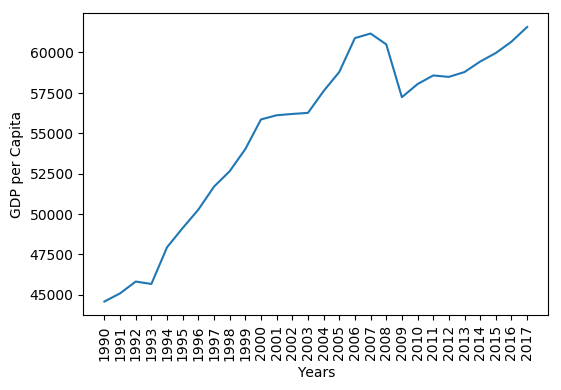

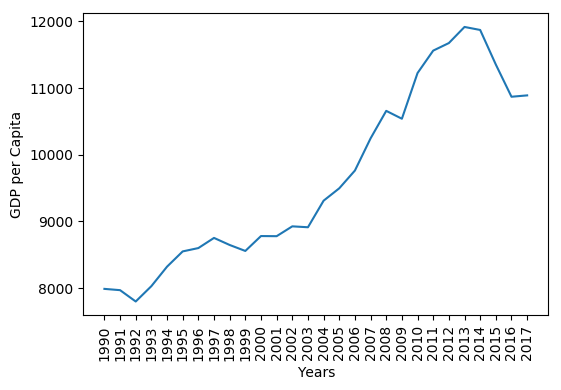

In [18]:
#Tonje
#Just to check that it works for different inputs 
interactive_figure('Denmark',data_wb)
interactive_figure('Brazil',data_wb)



In [19]:
#Tonje
widgets.interact(interactive_figure,
    year = widgets.fixed(year),
    data_wb = widgets.fixed(data_wb),
    country=widgets.Dropdown(description="Country", options=data_wb.country.unique()),
    gdp_pC=widgets.fixed(gdp_pC)
);

interactive(children=(Dropdown(description='Country', options=('Brazil', 'China', 'Denmark', 'Spain', 'India',…

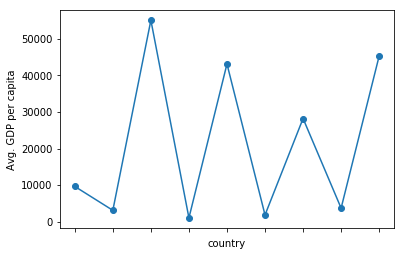

In [21]:
#Tonje: TRY
#Average GDP per capita?
ax = data_wb.groupby("country")['gdp_pC'].mean().plot(kind='line', style='-o'); 
ax.set_ylabel('Avg. GDP per capita'); 

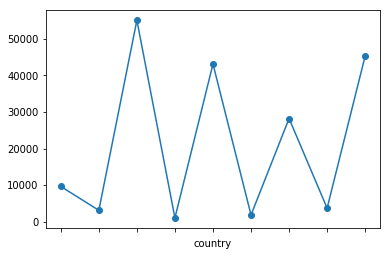

In [23]:
#Tonje: TRY
X=data_wb.country
Y=data_wb.groupby("country")['gdp_pC'].mean().plot(kind='line', style='-o'); 